In [15]:
from matplotlib import pyplot as plt
from shapely.geometry import Polygon, Point
from descartes import PolygonPatch

In [28]:
def venn(a_label, a_set, b_label, b_set):
    fig, ax = plt.subplots(figsize=(3, 2))
    ax.set_xlim(0, 3)
    ax.set_ylim(0, 2)
    
    qa = len(a_set.difference(b_set))
    qb = len(b_set.difference(a_set))
    qab = len(a_set.intersection(b_set))
    q_max = max(qa, qb, qab)
    
    c1 = Point(1,1).buffer(1)
    ax.text(1, 2, a_label, size=20, va="bottom", ha="right")
    c2 = Point(2, 1).buffer(1)
    ax.text(2, 2, b_label, size=20, va="bottom", ha="left")
    A = c1.difference(c2)
    B = c2.difference(c1)
    AB = c1.intersection(c2)
    
    for quantity, area in [(qa, A), (qb, B), (qab, AB)]:
        percent_of_max = quantity / q_max
        bg_color = (1-percent_of_max)*0.6+0.4
        ax.add_artist(PolygonPatch(area, facecolor=str(bg_color)))
        ax.text(area.centroid.x, area.centroid.y, quantity, size=16)
    plt.axis("off")

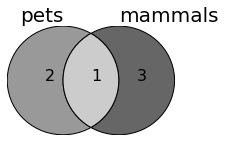

In [29]:
venn("pets", {"dogs", "snakes", "birds"}, "mammals", {"dogs", "cats", "whales", "gorillas"})